In [92]:
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import openTSNE
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [29]:
path = ("Path/To/Data")
df = pd.DataFrame(path)

1.benign.csv
1.gafgyt.combo.csv
1.gafgyt.junk.csv
1.gafgyt.scan.csv
1.gafgyt.tcp.csv
1.gafgyt.udp.csv
1.mirai.ack.csv
1.mirai.scan.csv
1.mirai.syn.csv
1.mirai.udp.csv
1.mirai.udpplain.csv


In [32]:
df_x = df.drop(['Threat','Threat_Binary'],axis = 1)

In [121]:
pca = PCA(n_components=3)
#df_y_binary = df_y['Threat_Binary']
#df_y = df_y['Threat']
#pca_result = pca.fit_transform(df[feat_cols].values)

In [41]:
print(df_x.shape)
print(df_y.shape)

(1018298, 115)
(1018298,)


In [123]:
x = df_x.values
y = df_y_binary.values
x = StandardScaler().fit_transform(x)

In [125]:
principalComponents = pca.fit_transform(x)

P_df = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3'])

In [107]:
P_vis_df = pd.concat([P_df,df_y_binary],axis = 1)
P_vis_df = pd.concat([P_vis_df,df_y],axis = 1)
P_vis_df.head()

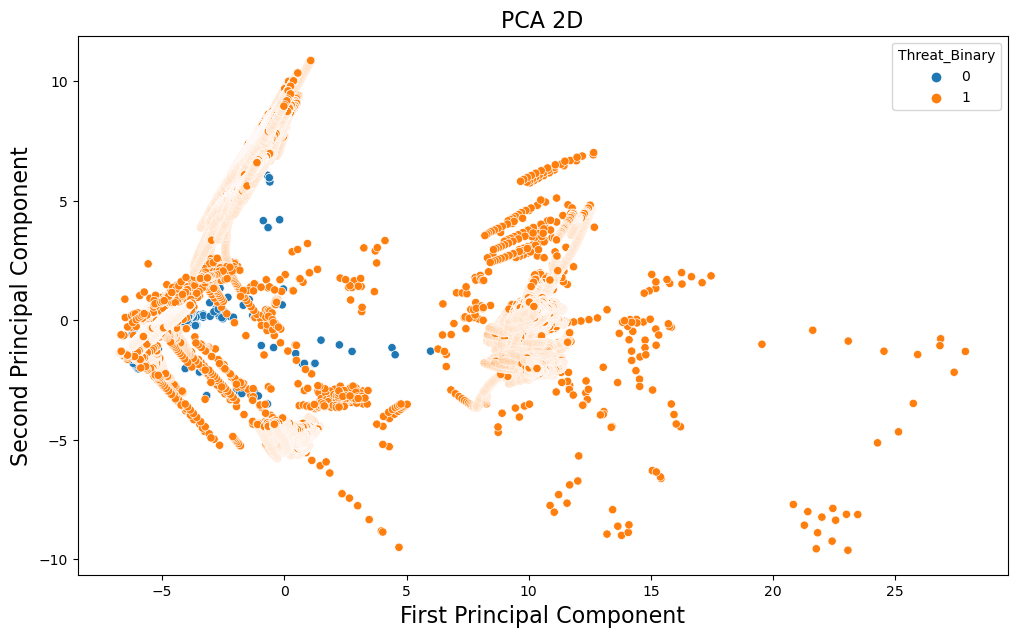

In [77]:
plt.figure(figsize=(12,7))
 
sns.scatterplot(data=P_vis_df, 
                x="PC1", 
                y="PC2", 
                hue="Threat_Binary")
 
plt.title("PCA 2D",
          fontsize=16)
plt.xlabel('First Principal Component',
           fontsize=16)
plt.ylabel('Second Principal Component',
           fontsize=16)
plt.show()

In [126]:
pca.explained_variance_ratio_

# PC1 : 36%, PC2: 10%, PC3: 9%
# Total: 55% of Variance Explained

array([0.36142478, 0.10663992, 0.09737147, 0.07457468, 0.06945445])

C:\Users\brand\AppData\Local\Temp\ipykernel_21548\1156011331.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


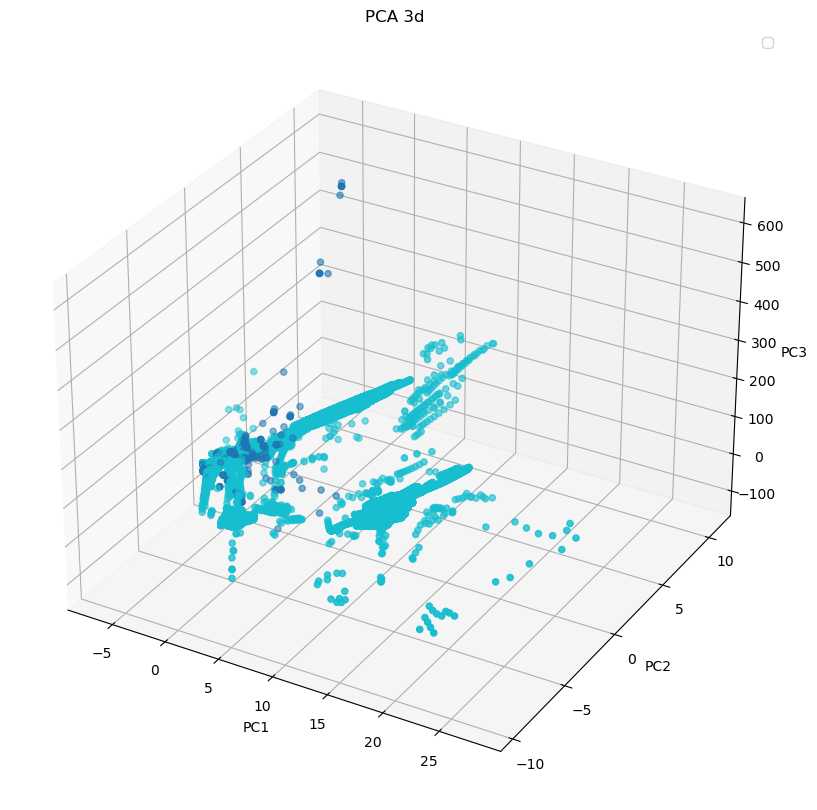

In [110]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=P_vis_df["PC1"], 
    ys=P_vis_df["PC2"], 
    zs=P_vis_df["PC3"], 
    c=P_vis_df["Threat_Binary"], 
    cmap='tab10'
)
ax.set_xlabel('PC1-36%')
ax.set_ylabel('PC2-10%')
ax.set_zlabel('PC3-9%')
ax.set_title('PCA 3d')

plt.show()

C:\Users\brand\AppData\Local\Temp\ipykernel_21548\1608160930.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


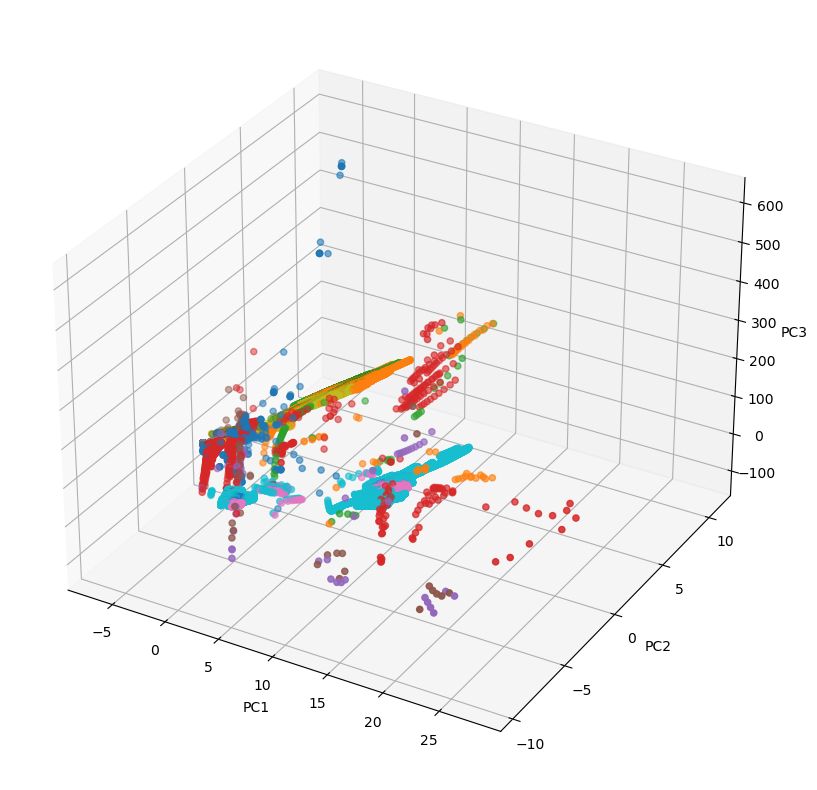

In [109]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=P_vis_df["PC1"], 
    ys=P_vis_df["PC2"], 
    zs=P_vis_df["PC3"], 
    c=P_vis_df["Threat"], 
    cmap='tab10'
)
ax.set_xlabel('PC1-36%')
ax.set_ylabel('PC2-10%')
ax.set_zlabel('PC3-9%')

plt.show()

In [101]:
#tsne = TSNE(n_components=2, verbose=1, perplexity=2, n_iter=300)
##x = df_x.values
#y = df_y_binary.values
#x = StandardScaler().fit_transform(x)
#tsne_results = tsne.fit_transform(P_vis_df)
#tsne_results.head()

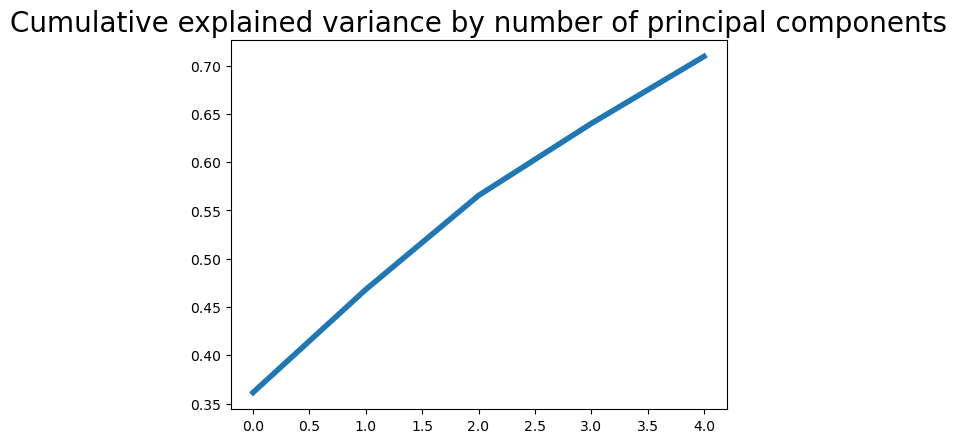

In [127]:
#print(abs(pca.components_))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=4)
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

# 2 PCs explains 57.5% of the Variance

In [136]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), #115x5 Vector
    columns=[f'PC{i}' for i in range(1, len(P_df.columns) + 1)] #5x1
    #index=x.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5
0,0.548068,0.288706,-0.177272,0.512195,-0.381254
1,0.857431,-0.338655,-0.034373,0.058760,-0.026519
2,0.729540,-0.492492,-0.083521,0.245010,-0.173277
3,0.613908,0.329881,-0.174701,0.497967,-0.368609
4,0.854273,-0.394794,-0.052695,0.123116,-0.076260


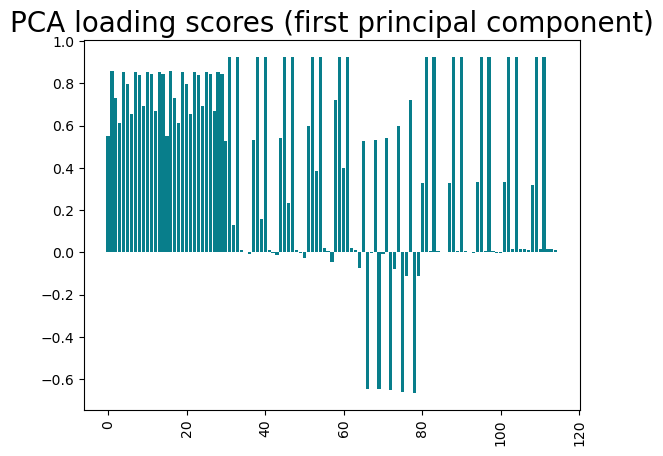

In [137]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

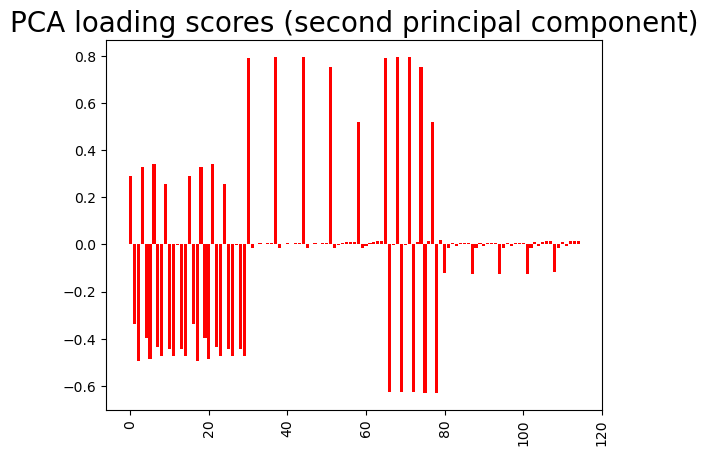

In [144]:
pc1_loadings = loadings.sort_values(by='PC2', ascending=False)[['PC2']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC2']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC2'], color='red')
plt.title('PCA loading scores (second principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

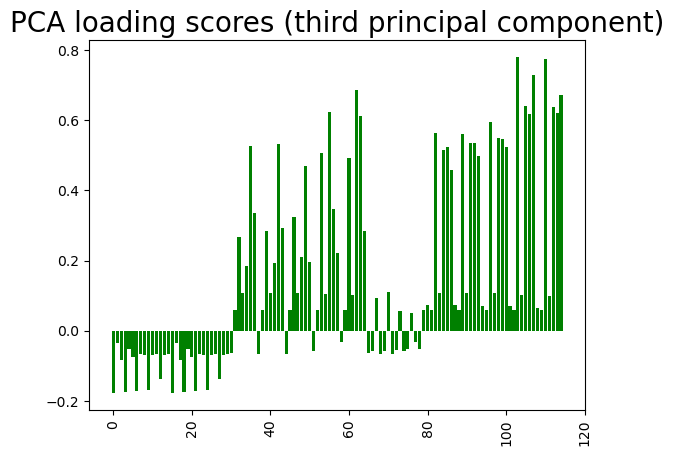

In [143]:
pc1_loadings = loadings.sort_values(by='PC3', ascending=False)[['PC3']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC3']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC3'], color='green')
plt.title('PCA loading scores (third principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()